Лабораторная работа
Вяткина Арина
Минеева Анна
РИ-471223

# Кластерный анализ
## Метод к-средних



Дана матрица данных $X$ и дано число $k$ предполагаемых кластеров. Цель кластеризации представить данные в виде групп кластеров $C=\{C_1, C_2, \ldots, C_k\}$. Каждый кластер имеет свой центр:

\begin{equation}
\mu_i = \frac{1}{n_i} \sum \limits_{x_j \in C_i} x_j
\end{equation}

где $n_i = |C_i|$ - это количество точек в кластере $C_i$.

Таким образом, мы имеем некоторые кластеры $C=\{C_1, C_2, \ldots, C_k\}$ и необходимо оценить качество разбиения. Для этого будем вычислять сумму квадратических ошибок (SSE):

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

Цель найти
\begin{equation}
C^* = arg\min\limits_C \{SSE(C)\}
\end{equation}

### Алгоритм к-средних
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:
1. t = 0
2. случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;
3. повторять
    4. $t = t + 1$;
    5. $C_j = 0$ для всех $j = 1, \ldots, k$
    6. для каждого $x_j \in D$
        7. $j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$ \\\ присваиваем $x_j$ к ближайшему центру
        8. $C_{j^*} = C_{j^*} \cup {x_j}$
    9. для каждого i=1 до k
        10. $\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$
11. пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

## Задание
1. Написать программу, реализующую алгоритм к-средних.
2. Визуализировать сходимость центров кластеров.
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

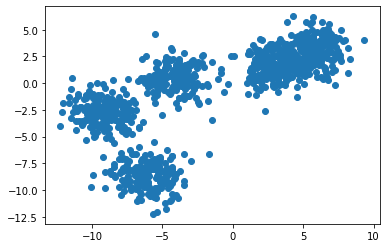

In [3]:
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

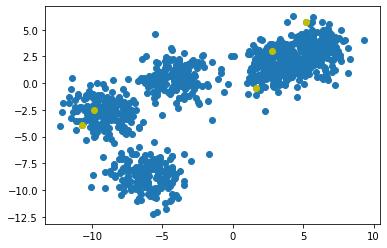

In [5]:
import numpy as np
# критерий остановки
eps = 0.01
# количество кластеров 
k_number = 5
k = X[np.random.choice(len(X), k_number)]
k1 = [[0 for i in range(2)] for j in range (len(k))]
plt.scatter(X[:,0], X[:,1])
plt.scatter(k[:,0], k[:,1], c ='y')

10  - итераций


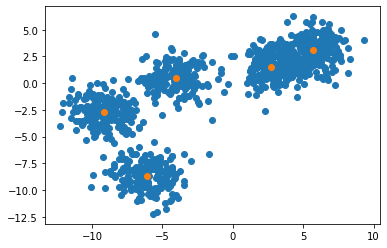

In [6]:
delt = 10000
# счетчик итераций
t = 0 
while delt > eps:
    mat = [[0 for i in range(len(k))] for j in range(len(X))]
   # i, j = 0, 0 ;
    for i in range (len(X)):
        for j in range(len(k)):
            # считаем эвклидово пространство
            mat[i][j] = math.sqrt((X[i,0] - k[j,0]) ** 2 + (X[i,1] - k[j,1]) ** 2)
            
   # i, j = 0, 0
    knear = [0] * len(X)
    for i in range(len(X)):
        min = 2000
        for j in range(len(k)):
            if mat[i][j] < min:
                min = mat[i][j]
                knear[i] = j
            else:
                min = min
                
   # n, q = 0, 0
    new_k = [[0 for i in range(3)] for j in range(len(k))]
    for n in range(len(X)):
        for q in range(len(k)):
            if knear[n] == q:
                new_k[q][0] += X[n,0] 
                new_k[q][1] += X[n,1]
                new_k[q][2] += 1
    delt = 0
    m = 0
    for m in range(len(k)):
        k1[m][0] = new_k[m][0] / new_k[m][2]
        k1[m][1] = new_k[m][1] / new_k[m][2]
        delt += math.sqrt((k1[m][0] - k[m][0]) ** 2 + (k1[m][1] - k[m][1]) ** 2)
   # i, j = 0, 0
    for i in range(len(k)):
        for j in range(2):
            k[i][j] = k1[i][j]
    t += 1

print(t, ' - итераций')
plt.scatter(X[:,0], X[:,1])
plt.scatter(k[:,0], k[:,1])

In [12]:
def score (k_number):
    k = X[np.random.choice(len(X), k_number)]
    k1 = [[0 for i in range(2)] for j in range (len(k))]
    delt = 10000
    # счетчик итераций
    t = 0 
    while delt > eps:
        mat = [[0 for i in range(len(k))] for j in range(len(X))]
       # i, j = 0, 0 ;
        for i in range (len(X)):
            for j in range(len(k)):
                # считаем эвклидово пространство
                mat[i][j] = math.sqrt((X[i,0] - k[j,0]) ** 2 + (X[i,1] - k[j,1]) ** 2)

       # i, j = 0, 0
        knear = [0] * len(X)
        for i in range(len(X)):
            min = 2000
            for j in range(len(k)):
                if mat[i][j] < min:
                    min = mat[i][j]
                    knear[i] = j
                else:
                    min = min

       # n, q = 0, 0
        new_k = [[0 for i in range(3)] for j in range(len(k))]
        for n in range(len(X)):
            for q in range(len(k)):
                if knear[n] == q:
                    new_k[q][0] += X[n,0] 
                    new_k[q][1] += X[n,1]
                    new_k[q][2] += 1
        delt = 0
        m = 0
        for m in range(len(k)):
            k1[m][0] = new_k[m][0] / new_k[m][2]
            k1[m][1] = new_k[m][1] / new_k[m][2]
            delt += math.sqrt((k1[m][0] - k[m][0]) ** 2 + (k1[m][1] - k[m][1]) ** 2)
       # i, j = 0, 0
        for i in range(len(k)):
            for j in range(2):
                k[i][j] = k1[i][j]
        t += 1
    return t

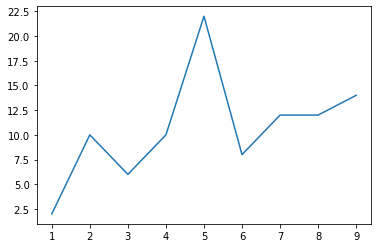

In [16]:
array = []
for i in range(1,10):
    array.append(score(i))
plt.plot(range(1,10), array)

## Реальные данные

используйте метод KMeans из sklearn.clustering

1. Выбрать оптимальное количество кластеров.
2. Построить 
2. Произвести анализ получившихся кластеров:
    1. определите средний год автомобилей;
    2. определите средний пробег автомобилей;
    3. определите среднюю мощность;
    4. определите среднюю цену автомобилей;
    5. основные марки автомобилей в кластере;
    6. определите тип топлива;
    7. определите основной тип кузова;
    8. определите основной тип привода;
    9. определите основной тип КПП;
    10. определите количество хозяев автомобиля.
Охарактеризуйте каждый класстер.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('data.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [69]:
new_df = pd.get_dummies(df)
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,2013.0,42000.0,1200.0,105.0,689196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,2012.0,62000.0,1800.0,152.0,639196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2015.0,4700.0,1600.0,106.0,629196.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,2012.0,70000.0,1600.0,110.0,479196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,2014.0,50000.0,2700.0,128.0,599196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [70]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = ss.fit_transform(new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']])
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,1.055883,-1.129295,-1.096928,-0.458895,0.420103,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0.868335,-0.842782,-0.125615,0.440164,0.315187,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,1.430978,-1.663641,-0.449386,-0.439766,0.294203,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0.868335,-0.728177,-0.449386,-0.363250,-0.020546,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1.243431,-1.014690,1.331355,-0.018930,0.231254,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [71]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
inertia = []
for it in np.arange(1,11,1):
    method = KMeans(n_clusters=it)
    method.fit(new_df)
    inertia.append(method.inertia_)
    print(it)

1
2
3
4
5
6
7
8
9
10


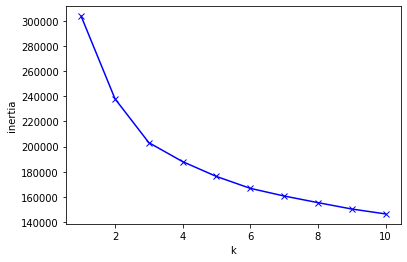

In [72]:
K = np.arange(1,11,1)
plt.plot (K, inertia, 'bx-') 
plt.xlabel ('k') 
plt.ylabel ('inertia') 
plt.show()

Вывод из полученного графика: оптимальное кол-во кластеров k = 3

In [73]:
def cls_info(df, k):
    print('------ Кластер ', k, ' -------')
    claster =  df[method.labels_ == k]
    print(claster['Год'].mean())
    print(claster['Пробег'].mean())
    print(claster['Объем'].mean())
    print(claster['Мощность'].mean())
    print(claster['Цена'].mean())
    print(claster['Привод'].value_counts().head(1))
    print(claster['Марка'].value_counts().head(2))
    print(claster['Кузов'].value_counts().head(2))
    print(claster['КПП'].value_counts().head(2))
    print(claster['Хозяев в ПТС'].value_counts().head(2))
    print(claster['Топливо'].value_counts().head(2))
    print('---------------------------')

In [75]:
for it in range(10):
    cls_info(df, it)

------ Кластер  0  -------
2006.1969038565996
151955.42558392178
2303.4763715372083
161.99918522542097
521001.77240630094
полный    1984
Name: Привод, dtype: int64
Hyundai    318
Nissan     313
Name: Марка, dtype: int64
седан        1324
кроссовер     975
Name: Кузов, dtype: int64
автомат     2282
механика    1196
Name: КПП, dtype: int64
3 и более      1781
2 владельца    1435
Name: Хозяев в ПТС, dtype: int64
бензин    2782
дизель     842
Name: Топливо, dtype: int64
---------------------------
------ Кластер  1  -------
2011.2929920477138
75754.18215705766
1636.431411530815
126.75571570576541
589247.6302186878
передний    3868
Name: Привод, dtype: int64
Volkswagen    458
Hyundai       382
Name: Марка, dtype: int64
седан      1997
хэтчбек    1401
Name: Кузов, dtype: int64
автомат     3694
вариатор     166
Name: КПП, dtype: int64
1 владелец     1786
2 владельца    1601
Name: Хозяев в ПТС, dtype: int64
бензин    3932
дизель      51
Name: Топливо, dtype: int64
---------------------------
-

Кластер 0:
В этом кластере находятся иномарки с большим пробегом. Автомобили старые, полный привод и средней мощность. Относятся к средней ценовой категории. Много владельцев. 

Кластер 1:
В этом кластере - новые автомобили, у которых небольшим пробег. Мощность средняя. Все они переднеприводные, кузов - автомат. Машины стоят до 600 тысяч рублей. Марки - Volkswagen и Hyundai. Почти все ездят на бензине. 

Кластер 2:
В этом кластере - машины иностранных марок с высокой мощностью. Мercedes-Benz и BMW. Тип кузова - кроссовер или внедорожник. Стоят до 1 000 000 рублей. Автоматическая КПП, пробег - средний. У каждой машины было больше одного владельца. 

Кластер 3:
В этом кластере находятся старые русские автомобили (ВАЗ, УАЗ). Самые дешёвые. У них маленькая мощность, механика, средний пробег - 84 000 км. Машины с кузовом седан или внедорожник.  Топливо - бензин. 

Кластер 4:
В этом кластере - новые автомобили: и русские (ВАЗ), и иностранные (Chevrolet). Можно сказать, что это средний класс. Цена также средняя, а пробег неболшой. Стоят около 400 тысяч рублей. В большинстве используют механику и передний привод. Тип кузова - седан или хэтчбек. 

Кластер 5:
В этом кластере мы видим современные иномарки (Toyota и Nissan), новые. Соотвественно с маленьким пробегом. Полноприводные, преимущественно кроссовер и седан, используют автомат. Дорогие - их цена немного больше 1 миллиона рублей.  

Кластер 6:
В этом кластере - самые новые (средний год - 2013) и  самые мощные автомобили. Также видим, что они самые дорогие - их стоимость превышает 2 миллиона рублей. Это машины иностранных топовых марок - Toyota и BMW. Внедорожники и кроссоверы, использующие автоматическую КПП. И дизель, и бензин. 

Кластер 7:
В этом кластере находятся машины среднего класса. Средний год - 2009. ВАЗ и Chevrolet. Маленькая мощность, тип кузова - седан и хэтчбек, механика. Их средняя цена - 300 тысяч рублей. У всех автомобилей 2 владельца. 

Кластер 8:
В этом кластере -  дешёвые автомобили с большим пробегом и низкой мощностью. ВАЗ и Ford Их цена около 200 тысяч рублей. Переднеприводные, их кузов - хэтчбек или седан. Почти у всех больше 3 хозяев в ПТС. 

Кластер 9:
В этом кластере находятся очень старые ( 1998 год) иномарки - Toyota и Nissan. Большой пробег, автомат, седан и универсал. Их цена около 200 тысяч рублей. Ездят на бензине, все были больше, чем у одного владельца. 